In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
pip install tensorboard

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(56, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
 
])

In [9]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
tf_callbacks = tf.keras.callbacks.TensorBoard(log_dir = "logs/fit" , histogram_freq = 1)

In [11]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 19s 3ms/step - loss: 0.7790 - accuracy: 0.7661 - val_loss: 0.3084 - val_accuracy: 0.9154
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3434 - accuracy: 0.8993 - val_loss: 0.2268 - val_accuracy: 0.9356
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9222 - val_loss: 0.1877 - val_accuracy: 0.9462
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2218 - accuracy: 0.9350 - val_loss: 0.1610 - val_accuracy: 0.9517
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1919 - accuracy: 0.9439 - val_loss: 0.1484 - val_accuracy: 0.9551
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1704 - accuracy: 0.9503 - val_loss: 0.1315 - val_accuracy: 0.9614
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1534 - accuracy: 0.9544 - val_loss: 0.1215 - val_accuracy

In [13]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 1700), started 0:00:03 ago. (Use '!kill 1700' to kill it.)

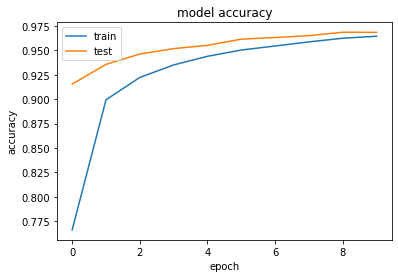

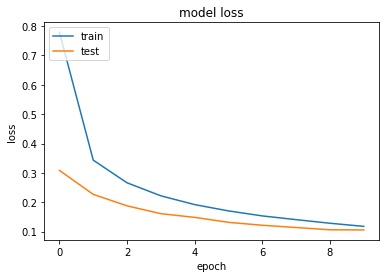

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()